In [1]:
import json
import math
import time

import numpy as np
import seaborn as sn
from sklearn.metrics import ConfusionMatrixDisplay

from classify import classify_subcategory

np.random.seed(0)

questions = open('questions.json')
questions = questions.readlines()
np.random.shuffle(questions)
questions = questions[:int(0.2*len(questions))]

with open('subcategories.txt') as f:
    SUBCATEGORIES = [line.strip() for line in f.readlines()]

In [7]:
EPSILON = 0.00001

print('=====Begin Testing=====')
time_now = time.perf_counter()

counter = 0
correct = 0
confusion_matrix = [[0 for _ in range(len(SUBCATEGORIES))] for _ in range(len(SUBCATEGORIES))]

for line in questions:
    data = json.loads(line)

    if 'subcategory' not in data:
        continue

    subcategory = data['subcategory']

    if subcategory not in SUBCATEGORIES:
        continue

    counter += 1

    if data['type'] == 'tossup':
        prediction = classify_subcategory(data['question'] + ' ' + data['answer'], EPSILON)

    if data['type'] == 'bonus' and 'parts' in data and len(data['parts']) == 3:
        prediction = classify_subcategory(data['leadin'] + ' ' + ' '.join(data['parts']) + ' ' + ' '.join(data['answers']), EPSILON)

    subcategory_index = SUBCATEGORIES.index(subcategory)
    prediction_index = SUBCATEGORIES.index(prediction)

    confusion_matrix[subcategory_index][prediction_index] += 1

    if subcategory == prediction:
        correct += 1

    if counter % 10000 == 0:
        print(f'{correct}/{counter}')

print('=====End Testing=====')
print(f'Accuracy: {100 * correct / counter}% ({correct}/{counter})')
print(f'Time: {time.perf_counter() - time_now} seconds')

=====Begin Testing=====
8193/10000
16381/20000
24633/30000
=====End Testing=====
Accuracy: 82.09508066244221% (26818/32667)
Time: 19.41653315498843 seconds


In [3]:
for i, subcat in enumerate(SUBCATEGORIES):
    accuracy = 0.0 if sum(confusion_matrix[i]) == 0 else confusion_matrix[i][i] / sum(confusion_matrix[i])
    accuracy = round(100 * accuracy, 2)
    print(f'{subcat + ":":21} {str(confusion_matrix[i][i]) + "/" + str(sum(confusion_matrix[i])):10} ({accuracy}%)')

American Literature:  1540/1929  (79.83%)
British Literature:   1354/1603  (84.47%)
European Literature:  1098/1295  (84.79%)
World Literature:     827/1045   (79.14%)
American History:     1670/2035  (82.06%)
Ancient History:      407/496    (82.06%)
European History:     1968/2410  (81.66%)
World History:        1473/1947  (75.65%)
Biology:              1638/1849  (88.59%)
Chemistry:            1349/1573  (85.76%)
Physics:              1548/1775  (87.21%)
Math:                 527/611    (86.25%)
Other Science:        894/1334   (67.02%)
Visual Fine Arts:     1760/2021  (87.09%)
Auditory Fine Arts:   1721/2055  (83.75%)
Other Fine Arts:      652/1021   (63.86%)
Religion:             1244/1457  (85.38%)
Mythology:            1472/1673  (87.99%)
Philosophy:           1171/1330  (88.05%)
Social Science:       1004/1203  (83.46%)
Current Events:       221/364    (60.71%)
Geography:            781/968    (80.68%)
Trash:                499/673    (74.15%)


In [4]:
print('Confusion Matrix:')
for subcat, row in zip(SUBCATEGORIES, confusion_matrix):
    print(f'{subcat:20}', row)

Confusion Matrix:
American Literature  [1540, 85, 71, 70, 34, 2, 8, 6, 0, 1, 2, 2, 1, 9, 3, 12, 4, 7, 22, 8, 8, 1, 33]
British Literature   [60, 1354, 53, 31, 10, 3, 10, 4, 2, 1, 0, 2, 0, 4, 2, 8, 11, 13, 8, 6, 2, 2, 17]
European Literature  [36, 52, 1098, 40, 3, 1, 6, 2, 0, 0, 1, 0, 2, 6, 2, 7, 1, 13, 12, 3, 0, 3, 7]
World Literature     [50, 48, 43, 827, 7, 0, 2, 10, 0, 0, 0, 0, 3, 2, 2, 3, 7, 14, 7, 5, 2, 6, 7]
American History     [32, 8, 2, 2, 1670, 8, 51, 65, 0, 0, 0, 0, 1, 10, 1, 8, 16, 3, 7, 22, 62, 41, 26]
Ancient History      [0, 4, 2, 1, 3, 407, 25, 21, 0, 0, 0, 0, 1, 8, 0, 2, 4, 7, 3, 2, 2, 4, 0]
European History     [11, 21, 12, 2, 62, 87, 1968, 81, 1, 0, 1, 0, 5, 9, 3, 16, 19, 8, 8, 12, 44, 33, 7]
World History        [3, 10, 3, 21, 66, 61, 108, 1473, 1, 0, 0, 2, 1, 7, 1, 5, 21, 12, 2, 11, 74, 57, 8]
Biology              [7, 4, 4, 2, 13, 4, 4, 3, 1638, 42, 11, 6, 41, 2, 1, 4, 2, 3, 1, 28, 6, 10, 13]
Chemistry            [3, 1, 0, 1, 6, 0, 3, 4, 32, 1349, 119, 6, 28, 2, 1,

<AxesSubplot:>

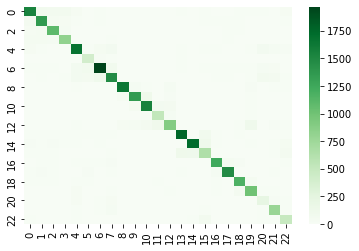

In [5]:
sn.heatmap(confusion_matrix, cmap='Greens', annot=False)

In [6]:
# ConfusionMatrixDisplay(np.array(confusion_matrix), display_labels='').plot()